#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns',100)

# Exploratory Data Analysis/ Data Preparation

#### Importing csv file 

In [3]:
br=pd.read_csv('day.csv')

In [4]:
br.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking dimensions

In [5]:
br.shape

(730, 16)

In [6]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Dataframe manipulation
No `NULL` values in the dataframe and hence no imputation or dropping required. However few datatypes may have to be changed as given below
- Change Dtype of `dteday` from string to datetime
#### Changing dtype of categorical variables from int to object and also replacing with suitable entries
- Change type of `season` to string subsequently change entries (1:spring, 2:summer, 3:fall, 4:winter).
- Similar operation to be done on `yr` (0: 2018, 1:2019) for better interpretation.
- Convert `weathersit` from numeric to string format.
- Convert `holiday` data type into yes for 1 and No for 0.
- Changing dtype of `weekday` and `workingday` to string type

#### Changing the entries of `season`, `weathersit` and `yr` columns and also their data type

In [7]:
# Applying functioin on season
br['season']=br['season'].astype(str)
def season(x):
    if x=='1':
        x='spring'
    else:
        if x=='2':
           x='summer'
        else:
            if x=='3':
               x='fall'
            else:
                if x=='4':
                   x='winter'
    return x

br['season']=br['season'].apply(lambda x:season(x))

# Applying function on yr
br['yr']=br['yr'].astype(str)
br['yr']=br['yr'].apply(lambda x: '2018' if x=='0' else '2019')

#Applying function on weathersit
br['weathersit']=br['weathersit'].astype(str)
def weathersit(x):
    if x=='1':
       x='Clear/partially cloudy'
    else:
        if x=='2':
           x='Mist+few_clouds'
        else:
            if x=='3':
                x='Light snow/rain'           
            else:
                 x='Heavy rain/Snow'    
    return x

br['weathersit']=br['weathersit'].apply(lambda x:weathersit(x))

#### Changing the data type of  `weekday`, `workingday` and `holiday` along with their entries

In [8]:
# Applying function on holiday
br['holiday']=br['holiday'].astype(str)
br['holiday']=br['holiday'].apply(lambda x: 'Yes' if x=='1' else 'No')

# Applying function on workingday
br['workingday']=br['workingday'].astype(str)
br['workingday']=br['workingday'].apply(lambda x: 'Yes' if x=='1' else 'No')

# Applying function on weekday
br['weekday']=br['weekday'].astype(str)

# Applying function on month
br['mnth']=br['mnth'].astype(str)

#### Dropping `instant` as it is not adding any value to dataframe and is just an index 

In [9]:
br.drop(columns='instant',inplace=True)

#### Dropping `dteday` as information contained in this is already covered in other columns

In [10]:
br.drop(columns='dteday',inplace=True)

In [11]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [12]:
br.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,1,No,6,No,Mist+few_clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,1,No,0,No,Mist+few_clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,1,No,1,Yes,Clear/partially cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,1,No,2,Yes,Clear/partially cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,1,No,3,Yes,Clear/partially cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Univariate and Bivariate Analysis

#### Plotting target variable against categorical variables

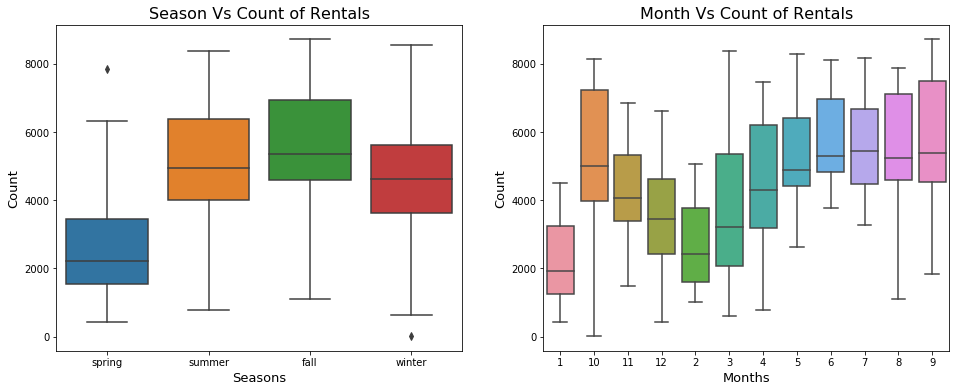

In [13]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(x=br['season'],y=br['cnt'])
plt.title('Season Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Seasons',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,2)
sns.boxplot(x=br['mnth'],y=br['cnt'])
plt.title('Month Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Months',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.show()

We can clearly see that the `season` and more precisely `mnth` have an influence over the bikes rented. Fall (July-October) have seen the highest rentals and spring months like (february-april) has seen the lowest ones.

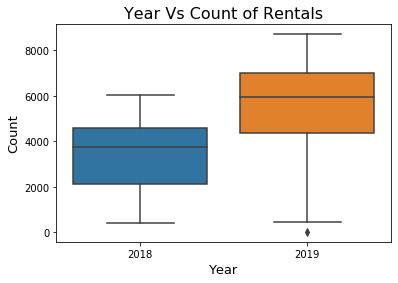

In [14]:
sns.boxplot(x=br['yr'],y=br['cnt'])
plt.title('Year Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Year',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.show()

We can see that the business has expanded from 2018 to 2019 which states that people like the rental boom bikes

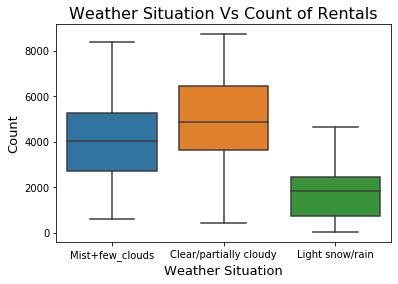

In [15]:
sns.boxplot(x=br['weathersit'],y=br['cnt'])
plt.title('Weather Situation Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Weather Situation',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.show()

We can observe that during snow the count is less whereas as the weather is clear/partially cloudy the count is more.

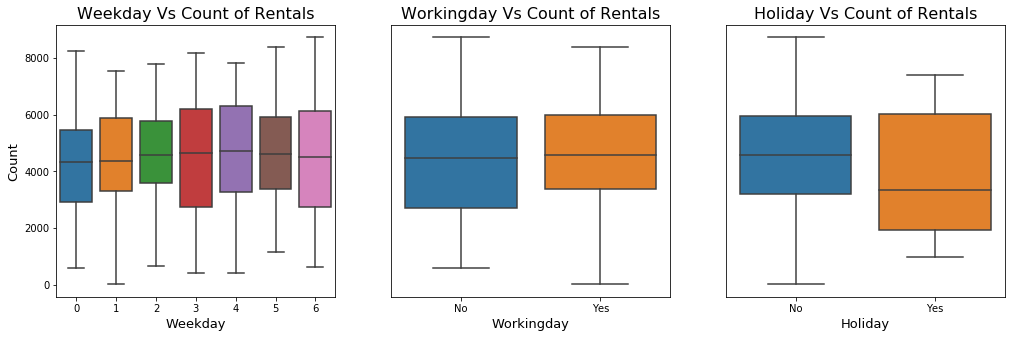

In [16]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.boxplot(x=br['weekday'],y=br['cnt'])
plt.title('Weekday Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Weekday',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,3,2)
sns.boxplot(x=br['workingday'],y=br['cnt'])
plt.title('Workingday Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Workingday',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.yticks([])

plt.subplot(1,3,3)
sns.boxplot(x=br['holiday'],y=br['cnt'])
plt.title('Holiday Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Holiday',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.yticks([])

plt.show()

We do not see significant difference in bike rentals during holidays and non holidays from above plots.

#### Plotting numeric variables against Target variable

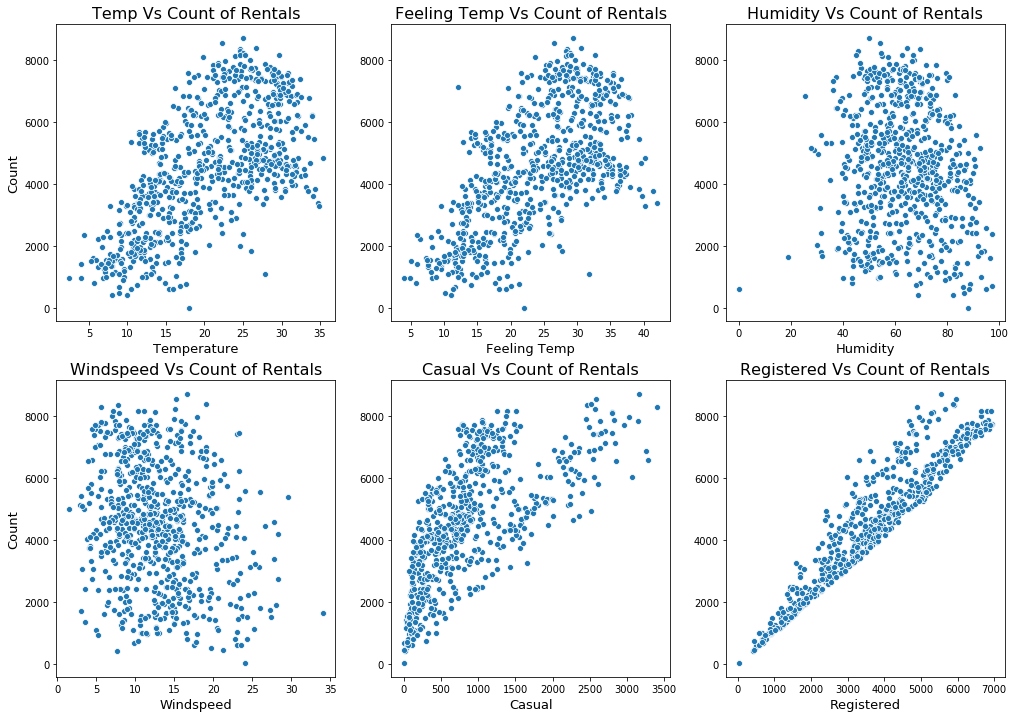

In [17]:
# Plotting scatterplot for numeric variables against Target 
plt.figure(figsize=(17,12))

plt.subplot(2,3,1)
sns.scatterplot(x=br['temp'],y=br['cnt'])
plt.title('Temp Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Temperature',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,2)
sns.scatterplot(x=br['atemp'],y=br['cnt'])
plt.title('Feeling Temp Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Feeling Temp',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplot(2,3,3)
sns.scatterplot(x=br['hum'],y=br['cnt'])
plt.title('Humidity Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Humidity',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplot(2,3,4)
sns.scatterplot(x=br['windspeed'],y=br['cnt'])
plt.title('Windspeed Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Windspeed',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,5)
sns.scatterplot(x=br['casual'],y=br['cnt'])
plt.title('Casual Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Casual',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplot(2,3,6)
sns.scatterplot(x=br['registered'],y=br['cnt'])
plt.title('Registered Vs Count of Rentals', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Registered',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.show()

We see some correlation(strong like registered and weak like Windspeed, humidity) between all numeric variable and target variable. Also Windspeed and Hummidty has negative slopes

#### Finding correlation between Target and numeric variables

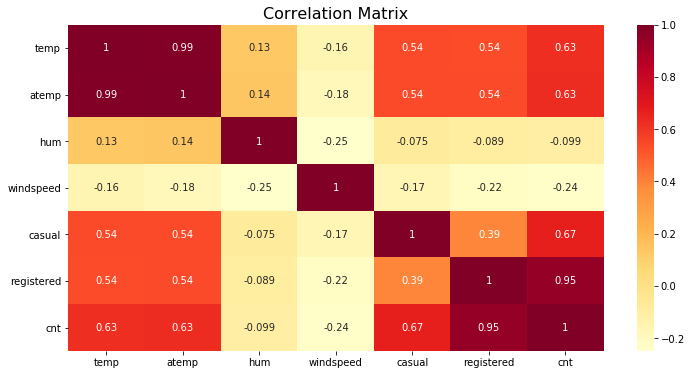

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(br.corr(),annot = True, cmap='YlOrRd')
plt.title('Correlation Matrix', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.show()

- We got exactly the same result as we interpreted from scatter plot. Registered have a high correlation whereas humidity has least. Also to note as evident from scatter plot humidty and windspeed has negative correlation which is obvious as it could be tiring to rent a bike when humidty or windspeed is high
- ALso we see atemp andd temp are highly co-linear and hence these may lead to multi-collinearity during regression.

# Data Preprocessing

#### Dropping highly correlated columns

In [19]:
br.drop(columns=['atemp'],axis=1,inplace=True)

We have dropped atemp because retaining temp makes more sense

#### Dropping `casual` and `registered` as they are highly correlated with target variable

In [20]:
br.drop(columns=['casual','registered'],axis=1,inplace=True)

#### Encoding Categorical Variables

Categorical Variables: `season`,`yr`,`mnth`,`holiday`,`weekday`,`workingday`,`weathersit`

NOTE: Variable with only two levels (`yr`,`holiday`,`workingday`) can be encoded with 0 and 1 binary but the variables with more levels needs to be replaced by dummy variables.

In [21]:
# holiday and weekday has two levels yes/no
catvar1=['holiday','workingday']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the bike rental datframe
br[catvar1] = br[catvar1].apply(binary_map)

# Yr has two value 2018 and 2019
catvar2=['yr']

def binary_map(x):
    return x.map({'2019': 1, "2018": 0})
# Applying the function to the bike rental datframe
br[catvar2] = br[catvar2].apply(binary_map)


In [22]:
br.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist+few_clouds,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist+few_clouds,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear/partially cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear/partially cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear/partially cloudy,9.305237,43.6957,12.522300,1600


#### Dummy Encoding

Giving meaning full labels to month and weekday entries before dummy encoding


In [23]:
br['mnth']=br['mnth'].astype(int)
br['weekday']=br['weekday'].astype(int)

In [24]:
month={1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
br.mnth = [month[item] for item in br.mnth] 


In [25]:
day={1:'Mon', 2:'Tue',3:'Wed',4:'Thr',5:'Fri',6:'Sat',0:'Sun'}
br.weekday = [day[item] for item in br.weekday] 

In [26]:
br.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist+few_clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist+few_clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/partially cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/partially cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/partially cloudy,9.305237,43.6957,12.522300,1600


Encoding variables with more than two levels

In [27]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status_season'
status_season = pd.get_dummies(br['season'], drop_first = True)

# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status_mnth'
status_mnth = pd.get_dummies(br['mnth'], drop_first = True)

# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status_wday'
status_wday = pd.get_dummies(br['weekday'], drop_first = True)

# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status_wsit'
status_wsit = pd.get_dummies(br['weathersit'], drop_first = True)

We have made seperate encoded dataframes for each variable. To proceed concatenate these dataframes to original dataframes and delete the columns from which these dataframes has been derived

In [28]:
# Add the results to the original housing dataframe
BR = pd.concat([br, status_season, status_mnth, status_wday, status_wsit], axis = 1)

Dropping Original Columns

In [29]:
BR.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [30]:
BR.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Light snow/rain,Mist+few_clouds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
BR.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Light snow/rain,Mist+few_clouds
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting into Train and Test Datasets

#### Splitting into 70% train set and 30% test test

In [32]:
# We specify this so that the train and test data set always have the same rows, respectively
br_train, br_test = train_test_split(BR, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
br_train.shape

(510, 29)

### Rescaling the features

We would scale the numeric features to 0-1 range and won't do anything for categorical variables as they already have only two values 0/1. This would lead to regresssion with better interpretability

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Numeric attributes
numvar=['temp','hum','windspeed','cnt']

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
br_train[numvar] = scaler.fit_transform(br_train[numvar])

br_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Light snow/rain,Mist+few_clouds
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.687393e-16,-3.459107e-16,-2.351061e-16,-5.398732e-17,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
br_train['summer'].value_counts()

0    385
1    125
Name: summer, dtype: int64

### Dividing into X and Y sets for model building

In [36]:
y_train = br_train.pop('cnt')
X_train = br_train

In [37]:
br_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Light snow/rain,Mist+few_clouds
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


# Regression

#### Building Linear Model

#### Using RFE for selecting top 15 variables for prediction. Rest we will do backward elimination to find optimal set of prediction inputs.

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 3),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thr', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light snow/rain', True, 1),
 ('Mist+few_clouds', True, 1)]

#### Columns extracted using RFE


In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'spring', 'winter', 'Dec', 'Feb',
       'Jan', 'Jul', 'Nov', 'Sep', 'Sat', 'Light snow/rain',
       'Mist+few_clouds'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model

In [45]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          5.70e-181
Time:                        13:25:15   Log-Likelihood:                -267.11
No. Observations:                 510   AIC:                             566.2
Df Residuals:                     494   BIC:                             634.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4521      0.062     

We would like to check the VIF before deleting any attibute, However we observe from summary, holiday is slightly insignificant

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,4.12
3,temp,3.11
2,workingday,2.83
5,winter,2.74
8,Jan,2.41
7,Feb,1.95
0,yr,1.90
10,Nov,1.89
6,Dec,1.68
14,Mist+few_clouds,1.52


#### We see that p-value of `Feb` is very high, hence we would drop `Feb` and this may change the VIF of variables

In [47]:
X_train_rfe = X_train_rfe.drop(['Feb'], axis = 1)

In [48]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'spring', 'winter', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'Sat', 'Light snow/rain', 'Mist+few_clouds'],
      dtype='object')

Rebuilding model without `Feb`

In [49]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.47e-181
Time:                        13:25:16   Log-Likelihood:                -268.41
No. Observations:                 510   AIC:                             566.8
Df Residuals:                     495   BIC:                             630.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4594      0.062     

#### Checking VIF of variables

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,3.08
3,temp,2.98
2,workingday,2.82
5,winter,2.73
0,yr,1.89
9,Nov,1.85
7,Jan,1.74
6,Dec,1.55
13,Mist+few_clouds,1.52
11,Sat,1.42


#### We see that VIF of variables are not high enough to drop at first instant but thing to note here is that even after dropping `Feb` in previous step, the `holiday` has remained insignificant. Hence we would like to drop `holiday` first based on p value in this case.

In [51]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)

#### Rebuilding model

In [52]:
#Adding constant
X_train_lm=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          5.55e-182
Time:                        13:25:18   Log-Likelihood:                -270.13
No. Observations:                 510   AIC:                             568.3
Df Residuals:                     496   BIC:                             627.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4910      0.059     

In [53]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,2.99
2,temp,2.95
4,winter,2.71
1,workingday,2.69
0,yr,1.88
8,Nov,1.82
6,Jan,1.74
5,Dec,1.54
12,Mist+few_clouds,1.52
10,Sat,1.39


#### We see that VIF of `spring` is moderately high and p value of `Jan` is high yet under the significance of 5%. So we would drop spring in this step to see if the significance of coefficients change or not.

In [54]:
X_train_rfe=X_train_rfe.drop(['spring'],axis=1)

Rebuilding model without `spring`

In [55]:
#Adding constant
X_train_lm=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.14e-173
Time:                        13:25:20   Log-Likelihood:                -292.62
No. Observations:                 510   AIC:                             611.2
Df Residuals:                     497   BIC:                             666.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6570      0.056    -

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,2.36
1,workingday,2.29
2,temp,2.04
0,yr,1.82
7,Nov,1.81
5,Jan,1.59
4,Dec,1.54
11,Mist+few_clouds,1.52
6,Jul,1.36
9,Sat,1.29


#### We see the coefficient of `Nov` still a bit insignificant and VIF of `winter ` bit high, yet both are within acceptable norms.  However we observe that winter and november may be related and  hence dropping one may influence other. So we wil drop `Nov` in this step and observe the change in VIF

In [57]:
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [58]:
#Adding constant
X_train_lm=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          8.52e-174
Time:                        13:25:21   Log-Likelihood:                -295.07
No. Observations:                 510   AIC:                             614.1
Df Residuals:                     498   BIC:                             665.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6679      0.056    -

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.28
2,temp,1.97
0,yr,1.81
5,Jan,1.57
3,winter,1.56
10,Mist+few_clouds,1.52
6,Jul,1.35
4,Dec,1.32
8,Sat,1.29
7,Sep,1.17


#### We see that VIF of `winter` has now decreased.  Also since we have decided to keep `winter` in last step we see here that now `Dec` has now got insignificant and `Dec` falls in `winter` month.

#### `Dec` is having high p value and hence to be dropped

In [60]:
X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)

In [61]:
#Adding constant
X_train_lm=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     216.5
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          2.38e-174
Time:                        13:25:22   Log-Likelihood:                -296.55
No. Observations:                 510   AIC:                             615.1
Df Residuals:                     499   BIC:                             661.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6742      0.056    -

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.25
2,temp,1.83
0,yr,1.81
4,Jan,1.52
9,Mist+few_clouds,1.52
3,winter,1.47
5,Jul,1.35
7,Sat,1.28
6,Sep,1.17
8,Light snow/rain,1.07


#### Now all coefficients are significant and VIF is also under acceptable norms. However, we would like to make our model better and let us see what impact do we have by dropping `workingday` as it has slightly high VIF 

In [63]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [64]:
#Adding constant
X_train_lm=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.7
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          1.37e-170
Time:                        13:25:23   Log-Likelihood:                -308.24
No. Observations:                 510   AIC:                             636.5
Df Residuals:                     500   BIC:                             678.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4712      0.038    -

In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,1.82
3,Jan,1.47
0,yr,1.46
2,winter,1.38
8,Mist+few_clouds,1.34
4,Jul,1.31
5,Sep,1.15
6,Sat,1.13
7,Light snow/rain,1.05


In [66]:
X_train_rfe=X_train_rfe.drop(['Sat'],axis=1)

In [67]:
#Adding constant
X_train_lm=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Deriving the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          2.96e-171
Time:                        13:25:24   Log-Likelihood:                -309.55
No. Observations:                 510   AIC:                             637.1
Df Residuals:                     501   BIC:                             675.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4574      0.037    -

In [68]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,1.82
3,Jan,1.46
0,yr,1.44
2,winter,1.37
7,Mist+few_clouds,1.32
4,Jul,1.31
5,Sep,1.15
6,Light snow/rain,1.05


## Residual Analysis of the train data

let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

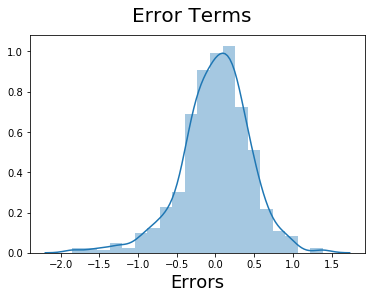

In [69]:
y_train_pred=lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)           

#### The error follows normal distribution and satisfies assumptions of linear regression

In [70]:
br_train['error']=y_train-y_train_pred

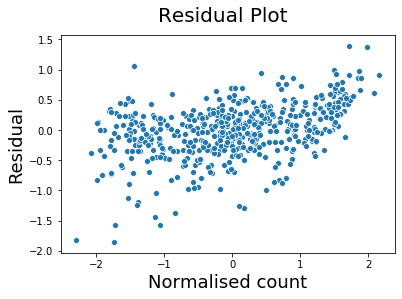

In [71]:
fig = plt.figure()
sns.scatterplot(y_train,br_train['error'])
fig.suptitle('Residual Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Normalised count', fontsize = 18)    
plt.ylabel('Residual', fontsize = 18)     
plt.show()

#### The residual plot shows the variance of residuals. We see that the residuals are having almost constant variance (Homoscedasticity) also satisfying the assumption of linear regression. However we see there may be a small difference in variance as the points are slightly more spread at the start then at the end. However it is not very significant

## Evaluating Predictions with Test Set

In [72]:
br_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Light snow/rain,Mist+few_clouds
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [73]:
# Numeric attributes
numvar=['temp','hum','windspeed','cnt']

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
br_test[numvar] = scaler.transform(br_test[numvar])

br_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Light snow/rain,Mist+few_clouds
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Diving test set inyo X_test and y_test

In [74]:
y_test = br_test.pop('cnt')
X_test = br_test

In [75]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

In [76]:
# Predicting on test set
y_test_pred=lm.predict(X_test_lm)

## Model Evaluation

Text(0, 0.5, 'y_pred')

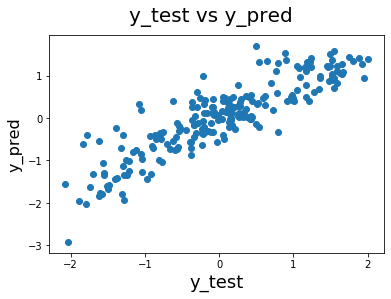

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [78]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7819538313305128

#### Hence the R^2 on the test model is 78.2%

We can see that the equation of our best fitted line is:

$\textbf{COUNT} = 1.0330  \times  \textbf{yr} + 0.595  \times  \textbf{temp} + 0.431 \times \textbf{winter} - 0.323 \times \textbf{Jul} + 0.296 \times \textbf{Sep} - 0.264 \times \textbf{Jan} - 1.313 \times \textbf{Light snow/rain} - 0.3256 \times \textbf{Mist/few_clouds} - 0.4574 $


### CONCLUSION:
- `Light snow` is the most significant variable with negative influence hence we can say that there are less people renting bikes when it snows
- However we see that `winter` has positive correlation. Also the `temp` also have positive influnce and hence we can conclude that if there is `winter` and the `temp` is high like in the winter afternoon people prefer to have biking experience. This is because in winter unlike summer there won't be scorching heat. But we have `Jan` with negative influence because probably this is the time of winter when it generally snows. 
- Also we specially see that `Sep` has positive relation as September is the time of fall and generally during fall we see nice weather all the day and any time is good to have biking experience.
- Similarly with `Jul` we have negative coefficient because it generally rains during this time marking the end of summer.
- We see that `yr` has a high positive influence which states that people are having good experience and in coming years once lockdown is over, probably many people would be renting bikes.
- Also we see `few clouds` have negative influence as people fear that it may rain and they avoid going out during this time.
